# Session 3 — Sentence-Level Analysis
## Measure 5: Sentence Types & Dialogue Ratio

Many literary texts mix narration with dialogue. This notebook measures:
- share of sentences in quotation marks (dialogue)
- share of interrogatives (questions) and exclamatives
- remaining narrative sentences

This helps characterize narrative style per author or per chapter.

**About Dialogue Detection:**

Our method detects sentences containing quotation marks (both straight " and curly " "). This is a **simplified heuristic** with known limitations:

**Limitations:**
- **Multi-sentence dialogue**: A single speech spanning multiple sentences will mark each as dialogue, which is correct
- **Nested quotes**: Quotes within quotes (e.g., "She said 'hello'") are treated uniformly
- **Non-dialogue quotes**: Quotation marks used for emphasis or titles will be misclassified
- **Broken dialogue**: Narrative interruptions within quoted speech (e.g., "Hello," she said, "how are you?") are handled at sentence level

**Why this approach?**
- **Simple and interpretable**: Easy to understand and implement
- **Good enough for literary analysis**: Captures the overall balance of direct speech vs narration
- **Corpus-level patterns**: Small errors average out when analyzing entire books

**Better alternatives** (not implemented here):
- Full dialogue parser tracking opening/closing quotation pairs
- NLP models trained to identify speaker attribution
- Regex patterns for common dialogue structures ("...", said X, "...")

**Why measure sentence types?**
- **Narrative pacing**: High dialogue ratio = faster pace, more character interaction
- **Genre markers**: Children's literature often has more dialogue than literary fiction
- **Author style**: Some authors prefer "showing" (dialogue) vs "telling" (narration)

We'll analyze Lewis Carroll's two Alice books, which are famous for their extensive dialogue.

In [41]:
import re

# Load the Alice books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]
    
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both books
Iliad_text = load_book(r"D:\applied-NLP-week3\Homer_Iliad_book.txt")
Odyssey_text = load_book(r"D:\applied-NLP-week3\Homer_Odyssey_book.txt")

print(f"Iliad loaded: {len(Iliad_text):,} characters")
print(f"Odyssey loaded: {len(Odyssey_text):,} characters")

Iliad loaded: 807,625 characters
Odyssey loaded: 610,623 characters


In [42]:
import re

def analyze_sentence_types(text, book_name):
    """Analyze sentence types: dialogue, questions, exclamations, narrative"""
    # Split into sentences more carefully to preserve punctuation
    sentences = re.split(r'([.!?]+)\s+', text)
    
    # Rebuild sentences with their punctuation
    rebuilt = []
    for i in range(0, len(sentences) - 1, 2):
        if i + 1 < len(sentences):
            rebuilt.append(sentences[i] + sentences[i + 1])
    
    sentences = [s.strip() for s in rebuilt if s.strip() and len(s.split()) > 2]
    
    # Categorize sentences
    dialogue = []
    questions = []
    exclamations = []
    narrative = []
    
    for s in sentences:
        # Check for dialogue (contains quotation marks - both straight and curly quotes)
        # This catches any sentence with quoted material, including:
        # - Complete quoted sentences: "Hello," she said.
        # - Partial quotes within narrative: She said "hello" to him.
        # - Multi-sentence dialogue: Each sentence in a long speech is marked
        has_dialogue = bool(re.search(r'["\'"\'"]', s))
        
        is_question = '?' in s
        is_exclamation = '!' in s
        
        # Count in respective categories (note: categories can overlap)
        if has_dialogue:
            dialogue.append(s)
        if is_question:
            questions.append(s)
        if is_exclamation:
            exclamations.append(s)
        # Pure narrative = no dialogue, no questions, no exclamations
        if not (has_dialogue or is_question or is_exclamation):
            narrative.append(s)
    
    total = len(sentences)
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Total sentences: {total:,}")
    print(f"\nSentence Types (categories can overlap):")
    print(f"  Dialogue sentences: {len(dialogue):,} ({len(dialogue)/total*100:.1f}%)")
    print(f"  Questions: {len(questions):,} ({len(questions)/total*100:.1f}%)")
    print(f"  Exclamations: {len(exclamations):,} ({len(exclamations)/total*100:.1f}%)")
    print(f"  Pure narrative: {len(narrative):,} ({len(narrative)/total*100:.1f}%)")
    
    print(f"\nNote: A sentence can be both dialogue AND a question (e.g., 'Who are you?')")
    print(f"Pure narrative = sentences without quotes, questions, or exclamations.")
    
    # Show some examples
    print(f"\nExample dialogue sentences:")
    for sent in dialogue[:3]:
        display = sent if len(sent) < 120 else sent[:117] + "..."
        print(f"  - {display}")
    
    return {
        'total': total,
        'dialogue': len(dialogue),
        'questions': len(questions),
        'exclamations': len(exclamations),
        'narrative': len(narrative)
    }

with open(r"D:\applied-NLP-week3\Homer_Iliad_book.txt", "r", encoding="utf-8") as f:
    iliad_text = f.read()

with open(r"D:\applied-NLP-week3\Homer_Odyssey_book.txt", "r", encoding="utf-8") as f:
    odyssey_text = f.read()

Iliad_stats = analyze_sentence_types(Iliad_text, "The Iliad")
Odyssey_stats = analyze_sentence_types(Odyssey_text, "The Odyssey")



The Iliad
Total sentences: 4,194

Sentence Types (categories can overlap):
  Dialogue sentences: 1,240 (29.6%)
  Questions: 300 (7.2%)
  Exclamations: 9 (0.2%)
  Pure narrative: 2,813 (67.1%)

Note: A sentence can be both dialogue AND a question (e.g., 'Who are you?')
Pure narrative = sentences without quotes, questions, or exclamations.

Example dialogue sentences:
  - Now Chryses had come to the ships
of the Achaeans to free his daughter, and had brought with him a great
ransom: more...
  - "Sons of Atreus," he cried, "and all other Achaeans, may the gods
who dwell in Olympus grant you to sack the city of ...
  - "Old man," said
he, "let me not find you tarrying about our ships, nor yet coming
hereafter.

The Odyssey
Total sentences: 3,139

Sentence Types (categories can overlap):
  Dialogue sentences: 1,141 (36.3%)
  Questions: 261 (8.3%)
  Exclamations: 7 (0.2%)
  Pure narrative: 1,876 (59.8%)

Note: A sentence can be both dialogue AND a question (e.g., 'Who are you?')
Pure narrat

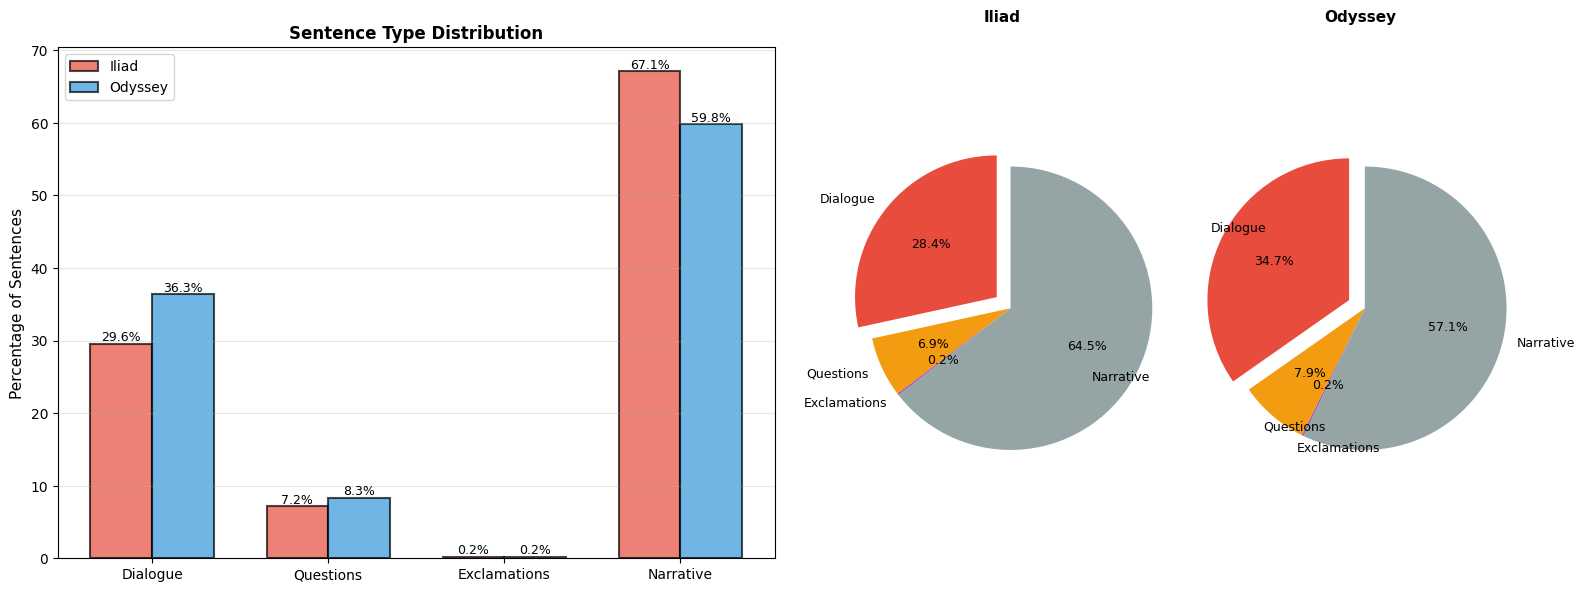


ANALYSIS SUMMARY
Both Alice books feature significant dialogue, which is characteristic
of Carroll's conversational and whimsical writing style.

Wonderland has 29.6% dialogue
Looking-Glass has 36.3% dialogue

This high proportion of dialogue makes the books engaging and accessible
to young readers while maintaining narrative complexity.


In [43]:
# Visualize the comparison
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
categories = ['Dialogue', 'Questions', 'Exclamations', 'Narrative']
iliad_pct = [
    Iliad_stats['dialogue'] / Iliad_stats['total'] * 100,
    Iliad_stats['questions'] / Iliad_stats['total'] * 100,
    Iliad_stats['exclamations'] / Iliad_stats['total'] * 100,
    Iliad_stats['narrative'] / Iliad_stats['total'] * 100
]
odyssey_pct = [
    Odyssey_stats['dialogue'] / Odyssey_stats['total'] * 100,
    Odyssey_stats['questions'] / Odyssey_stats['total'] * 100,
    Odyssey_stats['exclamations'] / Odyssey_stats['total'] * 100,
    Odyssey_stats['narrative'] / Odyssey_stats['total'] * 100
]

ax1 = axes[0]
x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, iliad_pct, width, label='Iliad',
                color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, odyssey_pct, width, label='Odyssey',
                color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Percentage of Sentences', fontsize=11)
ax1.set_title('Sentence Type Distribution', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Pie charts for each book
ax2 = axes[1]

# Create two pie charts side by side within the second subplot
pie_data_Iliad = [Iliad_stats['dialogue'],
              Iliad_stats['questions'],
              Iliad_stats['exclamations'],
              Iliad_stats['narrative']]
pie_data_Odyssey = [Odyssey_stats['dialogue'],
               Odyssey_stats['questions'],
               Odyssey_stats['exclamations'],
               Odyssey_stats['narrative']]

colors_pie = ['#e74c3c', '#f39c12', '#9b59b6', '#95a5a6']
explode = (0.05, 0, 0, 0)

# Create sub-axes for the two pie charts
from matplotlib.patches import Rectangle
ax2.text(0.25, 1.05, "Iliad", ha='center', transform=ax2.transAxes, fontsize=11, fontweight='bold')
ax2.text(0.75, 1.05, "Odyssey", ha='center', transform=ax2.transAxes, fontsize=11, fontweight='bold')

# Left pie
pie1 = ax2.pie(pie_data_Iliad, labels=categories, autopct='%1.1f%%', startangle=90,
               colors=colors_pie, explode=explode, textprops={'fontsize': 9},
               center=(-0.5, 0), radius=0.4)

# Right pie  
pie2 = ax2.pie(pie_data_Odyssey, labels=categories, autopct='%1.1f%%', startangle=90,
               colors=colors_pie, explode=explode, textprops={'fontsize': 9},
               center=(0.5, 0), radius=0.4)

ax2.set_xlim(-1, 1)
ax2.set_ylim(-0.5, 0.5)
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*70)
print("ANALYSIS SUMMARY")
print("="*70)
print("Both Alice books feature significant dialogue, which is characteristic")
print("of Carroll's conversational and whimsical writing style.")
print(f"\nWonderland has {Iliad_stats['dialogue']/Iliad_stats['total']*100:.1f}% dialogue")
print(f"Looking-Glass has {Odyssey_stats['dialogue']/Odyssey_stats['total']*100:.1f}% dialogue")
print("\nThis high proportion of dialogue makes the books engaging and accessible")
print("to young readers while maintaining narrative complexity.")